Numberical simulation

In [37]:
import importlib
importlib.reload(constant)
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
h = 10**(-10)

def two_prx(f, thetas, j, step_size):
    length = thetas.shape[0]

    return 1 / (2*np.sin(step_size)) * (
        f(thetas + step_size * base.unit_vector(j, length)) -
        f(thetas - step_size * base.unit_vector(j, length))
    )
    
def four_prx(f, thetas, j, step_size):
    length = thetas.shape[0]

    return - (constant.four_term_psr['d_plus'] * (
        f(thetas + step_size * base.unit_vector(j, length)) -
        f(thetas - step_size * base.unit_vector(j, length))
        - constant.four_term_psr['d_minus'] * (
            f(thetas + step_size * base.unit_vector(j, length)) - 
            f(thetas - step_size * base.unit_vector(j, length))
        )
    ))

def finite_diff (f, thetas, j, step_size):
    length = thetas.shape[0]
    return (1 / (2*step_size))*(f(thetas + step_size * base.unit_vector(j, length)) - f(thetas - step_size * base.unit_vector(j, length)))

In [38]:
step_sizes = np.arange(10**(-2), 1, 10**(-2))
thetas_origin = np.random.uniform(low=0, high=2*np.pi, size=(3,))
thetas_x, thetas_z, thetas_y = thetas_origin
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc
def udagger(qc, thetas):
    qc.cry(-thetas[2], 0, 1)
    qc.rz(-thetas[1], 1)
    qc.rx(-thetas[0], 0)
    return qc
def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    qc = udagger(qc, thetas_origin)
    return base.measure(qc, [0, 1])

e_std = []

# for j in range(thetas_origin.shape[0]):
    #if j != 2: 
    
    # else:
    #     grad_std.append(four_prx(f, thetas_origin, j))

for step_size in step_sizes:
    grad_finite = []
    grad_std = []
    for j in range(thetas_origin.shape[0]):
        grad_std.append(two_prx(f, thetas_origin, j, step_size))
        grad_finite.append(finite_diff(f, thetas_origin, j, step_size))
    e_std.append(mean_squared_error(grad_std, grad_finite))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


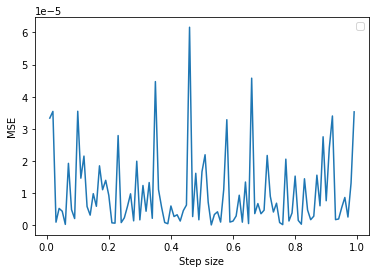

In [40]:
plt.plot(step_sizes, e_std)
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()